## **Spring 2023 : CS5720**


### Neural Networks & Deep Learning ICP_5 : Jahnavi Chadalavada (700728443) 


### Mount Google Drive

In [2]:
from google.colab import drive 
drive.mount('/NN') 


Mounted at /NN


## 1. Predicting the diabetes disease

### Add more Dense layers to the existing code and check how the accuracy changes

In [121]:
import keras
import pandas
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

path_to_diabetes_csv = '/NN/MyDrive/Colab Notebooks/NN/diabetes.csv'
diabetes_dataset = pd.read_csv(path_to_diabetes_csv, header=None).values

X_train, X_test, Y_train, Y_test = train_test_split(diabetes_dataset[:,0:8], diabetes_dataset[:,8],test_size=0.25, random_state=87)

diabetes_nn = Sequential() # create model
diabetes_nn.add(Dense(20, input_dim=8, activation='relu')) # hidden layer 1
diabetes_nn.add(Dense(20, activation='relu')) # hidden layer 2
diabetes_nn.add(Dense(20, activation='relu')) # hidden layer 3
diabetes_nn.add(Dense(1, activation='sigmoid')) # output layer
diabetes_nn.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['acc'])
diabetes_nn_fitted = diabetes_nn.fit(X_train, Y_train, epochs=100,initial_epoch=0,verbose=0)
print(diabetes_nn.summary())
print(diabetes_nn.evaluate(X_test, Y_test))

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_123 (Dense)           (None, 20)                180       
                                                                 
 dense_124 (Dense)           (None, 20)                420       
                                                                 
 dense_125 (Dense)           (None, 20)                420       
                                                                 
 dense_126 (Dense)           (None, 1)                 21        
                                                                 
Total params: 1,041
Trainable params: 1,041
Non-trainable params: 0
_________________________________________________________________
None
6/6 [==============================] - 0s 2ms/step - loss: 0.6182 - acc: 0.7083
[0.6181733012199402, 0.7083333134651184]


### 2. Change the data source to Breast Cancer dataset * available in the source code folder and make required changes.Report accuracy of the model.

In [122]:
import keras
import pandas
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

path_to_BreastCancer_csv = '/NN/MyDrive/Colab Notebooks/NN/breastcancer.csv'
bc_dataset = pd.read_csv(path_to_BreastCancer_csv)
bc_dataset=bc_dataset.dropna(how='all', axis=1) #drop empty column

labelencoder = LabelEncoder() # one hot encoding
bc_dataset['diagnosis'] = labelencoder.fit_transform(bc_dataset['diagnosis']) # Assigning numerical values 

predictors = bc_dataset.drop(["id","diagnosis",],axis=1)
target = bc_dataset["diagnosis"]
X_train, X_test, Y_train, Y_test = train_test_split(predictors,target, test_size=0.25, random_state=87)

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

bc_dataset_nn = Sequential() # create model
bc_dataset_nn.add(Dense(40, input_dim=30, activation='relu')) # hidden layer
bc_dataset_nn.add(Dense(1, activation='sigmoid')) # output layer
bc_dataset_nn.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['acc'])
bc_dataset_nn_fitted = bc_dataset_nn.fit(X_train, Y_train, epochs=100,initial_epoch=0,verbose=0)
print(bc_dataset_nn.summary())
print(bc_dataset_nn.evaluate(X_test, Y_test))

(426, 30) (143, 30)
(426,) (143,)
Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_127 (Dense)           (None, 40)                1240      
                                                                 
 dense_128 (Dense)           (None, 1)                 41        
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________
None
5/5 [==============================] - 0s 3ms/step - loss: 0.6498 - acc: 0.6503
[0.6497780680656433, 0.6503496766090393]


### 3. Normalize the data before feeding the data to the model and check how the normalization change your accuracy.

In [124]:
import keras
import pandas
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

bc_dataset = pd.read_csv(path_to_BreastCancer_csv)
bc_dataset=bc_dataset.dropna(how='all', axis=1) #drop empty column

labelencoder = LabelEncoder() # one hot encoding
bc_dataset['diagnosis'] = labelencoder.fit_transform(bc_dataset['diagnosis']) # Assigning numerical values 

predictors = bc_dataset.drop(["id","diagnosis",],axis=1)
target = bc_dataset["diagnosis"]
X_train, X_test, Y_train, Y_test = train_test_split(predictors,target, test_size=0.25, random_state=87)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train) # transform training data
X_test_std= sc.fit_transform(X_test) # transform testing data

bc_dataset_nn = Sequential() # create model
bc_dataset_nn.add(Dense(40, input_dim=30, activation='relu')) # hidden layer
bc_dataset_nn.add(Dense(1, activation='sigmoid')) # output layer
bc_dataset_nn.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['acc'])
bc_dataset_nn_fitted = bc_dataset_nn.fit(X_train_std, Y_train, epochs=100,initial_epoch=0,verbose=0)
print(bc_dataset_nn.summary())
print(bc_dataset_nn.evaluate(X_test_std, Y_test))

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_131 (Dense)           (None, 40)                1240      
                                                                 
 dense_132 (Dense)           (None, 1)                 41        
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________
None
5/5 [==============================] - 0s 3ms/step - loss: 0.1019 - acc: 0.9790
[0.10185987502336502, 0.9790209531784058]


## Use Image Classification on the hand written digits data set (mnist)

In [125]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_labels[0])
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
# print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=0,validation_data=(test_data, test_labels_one_hot))


5


### 1. Plot the loss and accuracy for both training data and validation data using the history object in the source code.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


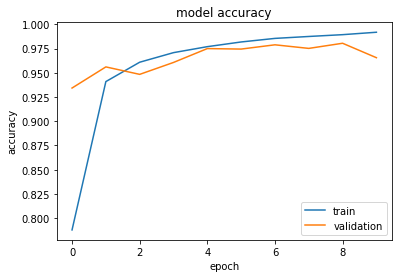

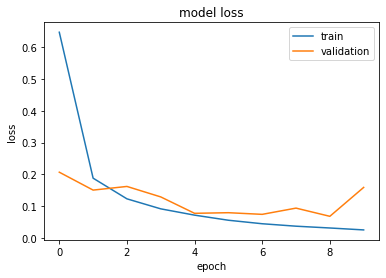

In [87]:
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

### 2. Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model on that single image.

1/1 [==============================] - 0s 64ms/step
The Model predicted output as :  [0]


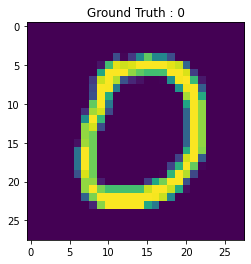

In [107]:
plt.imshow(test_data[10].reshape(28,28))
plt.title('Ground Truth : {}'.format(test_labels[10]))

yhat=model.predict(test_data[10].reshape(1,784))
predicted_output=np.argmax(yhat,axis=1)
print("The Model predicted output as : ",predicted_output)


### 3. We had used 2 hidden layers and Relu activation. Try to change the number of hidden layer and the activation to tanh or sigmoid and see what happens.

In [77]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_labels[0])
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
# print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='sigmoid'))
model.add(Dense(512, activation='tanh'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,validation_data=(test_data, test_labels_one_hot))


5
Epoch 1/10
235/235 [==============================] - 11s 42ms/step - loss: 0.6464 - accuracy: 0.7879 - val_loss: 0.2070 - val_accuracy: 0.9343
Epoch 2/10
235/235 [==============================] - 12s 49ms/step - loss: 0.1883 - accuracy: 0.9409 - val_loss: 0.1508 - val_accuracy: 0.9561
Epoch 3/10
235/235 [==============================] - 11s 48ms/step - loss: 0.1234 - accuracy: 0.9609 - val_loss: 0.1623 - val_accuracy: 0.9484
Epoch 4/10
235/235 [==============================] - 11s 49ms/step - loss: 0.0920 - accuracy: 0.9708 - val_loss: 0.1294 - val_accuracy: 0.9607
Epoch 5/10
235/235 [==============================] - 10s 41ms/step - loss: 0.0722 - accuracy: 0.9770 - val_loss: 0.0779 - val_accuracy: 0.9750
Epoch 6/10
235/235 [==============================] - 11s 48ms/step - loss: 0.0562 - accuracy: 0.9818 - val_loss: 0.0799 - val_accuracy: 0.9745
Epoch 7/10
235/235 [==============================] - 12s 50ms/step - loss: 0.0452 - accuracy: 0.9855 - val_loss: 0.0747 - val_accurac

### 4. Run the same code without scaling the images and check the performance?

In [76]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_labels[0])
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
# print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

# #convert data to float and scale values between 0 and 1
# train_data = train_data.astype('float')
# test_data = test_data.astype('float')
# #scale data
# train_data /=255.0
# test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,validation_data=(test_data, test_labels_one_hot))


5
Epoch 1/10
235/235 [==============================] - 8s 30ms/step - loss: 5.7313 - accuracy: 0.8779 - val_loss: 0.7220 - val_accuracy: 0.9252
Epoch 2/10
235/235 [==============================] - 5s 22ms/step - loss: 0.4261 - accuracy: 0.9465 - val_loss: 0.4219 - val_accuracy: 0.9349
Epoch 3/10
235/235 [==============================] - 7s 30ms/step - loss: 0.2395 - accuracy: 0.9612 - val_loss: 0.3949 - val_accuracy: 0.9351
Epoch 4/10
235/235 [==============================] - 5s 23ms/step - loss: 0.1815 - accuracy: 0.9670 - val_loss: 0.2370 - val_accuracy: 0.9649
Epoch 5/10
235/235 [==============================] - 10s 41ms/step - loss: 0.1489 - accuracy: 0.9728 - val_loss: 0.3346 - val_accuracy: 0.9552
Epoch 6/10
235/235 [==============================] - 7s 28ms/step - loss: 0.1396 - accuracy: 0.9761 - val_loss: 0.2852 - val_accuracy: 0.9671
Epoch 7/10
235/235 [==============================] - 8s 32ms/step - loss: 0.1294 - accuracy: 0.9792 - val_loss: 0.2731 - val_accuracy: 0.9